# Libraries

In [2]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA
import nltk
from nltk.corpus import stopwords

# Uncorrelation 

In [8]:
def GetUncorrelatedAssets(returns, num_assets):

    correlation = returns.corr()
    
    # Find assets with lowest mean correlation, scaled by STD
    selected = []
    for index, row in correlation.iterrows():
        corr_rank = row.abs().mean()/row.abs().std()
        selected.append((index, corr_rank))

    # Sort and take the top num_assets with lowest correlation to each others
    selected = sorted(selected, key = lambda x: x[1])[:num_assets]
    
    return selected

In [9]:
# Define a list of 10 stock tickers
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOGL', 'PLTR', 'FUBO', 'ARKK', 'ZI', 'UPST']

# Download historical data for the last 30 days to compute adjusted close returns
data = yf.download(tickers, start="2022-10-25", end="2023-11-24")['Adj Close']

# Compute daily returns
returns = data.pct_change().dropna()

[*********************100%%**********************]  10 of 10 completed


In [10]:
GetUncorrelatedAssets(returns, num_assets=3)

[('FUBO', 1.8850719781367191),
 ('MSFT', 2.082638695541522),
 ('ZI', 2.1298550559956153)]

# Exploratory Data Analysis

Source of dataset: https://www.kaggle.com/datasets/deepakjoshi2k/yahoo-stock-prediction-by-news

In [2]:
data = pd.read_csv('APPLE_News.csv',index_col="Date")
data.head(9)

,Unnamed: 0,ticker,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,,,,,,
2020-01-27,0,AAPL,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2020-01-27,1,AAPL,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2020-01-27,2,AAPL,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2020-01-27,3,AAPL,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2020-01-27,4,AAPL,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2020-01-27,5,AAPL,opinion,Top Stock Analyst Reports For Merck Broadcom ...,Monday January 27 2020The Zacks Research Dai...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2020-01-27,6,AAPL,news,Stocks Europe Seen Opening Lower as Virus Co...,By Peter Nurse \nInvesting com European stoc...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2020-01-27,7,AAPL,news,Intelligent Systems wins bullish rating from B...,BTIG analyst Mark Palmer initiates coverage of...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2020-01-24,8,AAPL,opinion,What To Do If A Stock On Your Buy List Has A...,I got a great question recently from Barbara P...,80.062500,80.832497,79.379997,79.577499,78.089607,146537600,0


In [3]:
data = data.sort_index(ascending=True)
data.head()

,Unnamed: 0,ticker,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
Date,,,,,,,,,,,,
2012-07-23,15974,AAPL,opinion,Trade Apple After Earnings,It may look like a spider web but the mishmas...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1
2012-07-23,15973,AAPL,opinion,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1
2012-07-23,15972,AAPL,opinion,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1
2012-07-24,15967,AAPL,opinion,Market Bait And Switch,That is the sound we are going to hear soon fr...,21.692142,21.774286,21.375357,21.461430,18.324455,565132400,0
2012-07-27,15968,AAPL,opinion,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...,20.536072,20.922501,20.413929,20.898571,17.843870,403936400,1


In [4]:
combined_df = data.groupby(data.index).agg({
    'title': '. '.join, # concatenates all the values in the group, separated by the '|' character
    'content': '. '.join
    # 'category': 'first', # keep the first value from the group
    # 'label': 'first',
})
combined_df.columns = combined_df.columns.str.capitalize()
combined_df.index = pd.to_datetime(combined_df.index)
combined_df

,Title,Content
Date,,
2012-07-23,Trade Apple After Earnings. Apple Earnings Pre...,It may look like a spider web but the mishmas...
2012-07-24,Market Bait And Switch,That is the sound we are going to hear soon fr...
2012-07-27,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...
2012-07-30,Bulls Snatch Victory From Jaws of Defeat,Last week the bulls pulled another save out o...
2012-07-31,50 Stocks With The Best Dividend Growth In Jul...,Here is a current sheet of companies with fast...
...,...,...
2020-01-21,Saratoga Investment Enters Overbought Territor...,Saratoga Investment Corp NYSE SAR has mov...
2020-01-22,Fragile Stability In Capital Markets Even As S...,Overview The S P 500 lost less than 0 3 yest...
2020-01-23,Lam Research LRCX To Report Q2 Earnings Wha...,Lam Research Corporation NASDAQ LRCX is sl...


In [5]:
# Download stock data
start_date = data.index[0] #- timedelta(days=7)
end_date = data.index[-1]
ticker = "AAPL"
aapl_data = yf.download(ticker, start=start_date, end=pd.to_datetime(end_date)+ pd.DateOffset(days=1))
aapl_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-23,21.228571,21.639286,20.989643,21.565357,18.232492,487975600
2012-07-24,21.692142,21.774286,21.375357,21.461430,18.144630,565132400
2012-07-25,20.516430,20.742857,20.357143,20.534643,17.361073,877312800
2012-07-26,20.705713,20.728571,20.370001,20.531429,17.358351,406632800
2012-07-27,20.536072,20.922501,20.413929,20.898571,17.668755,403936400


In [6]:
# Perform an outer merge on the DatetimeIndex
asset_data = pd.merge(aapl_data, combined_df, left_index=True, right_index=True, how='left').fillna('0')
asset_data.head()

,Open,High,Low,Close,Adj Close,Volume,Title,Content
Date,,,,,,,,
2012-07-23,21.228571,21.639286,20.989643,21.565357,18.232492,487975600,Trade Apple After Earnings. Apple Earnings Pre...,It may look like a spider web but the mishmas...
2012-07-24,21.692142,21.774286,21.375357,21.461430,18.144630,565132400,Market Bait And Switch,That is the sound we are going to hear soon fr...
2012-07-25,20.516430,20.742857,20.357143,20.534643,17.361073,877312800,0,0
2012-07-26,20.705713,20.728571,20.370001,20.531429,17.358351,406632800,0,0
2012-07-27,20.536072,20.922501,20.413929,20.898571,17.668755,403936400,Will AAPL Fall From The Tree,Apple s AAPL sales for the third quarter mis...


# Sentiment Analysis

In [7]:
stop = stopwords.words('english')
asset_data['Title'] = asset_data['Title'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
asset_data['Content'] = asset_data['Content'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [8]:
# Sentiment analysis using vaderSentiment
def analyze_sentiment(text):
    analyzer = SIA()
    scores = analyzer.polarity_scores(text)
    return scores['compound']
    
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

asset_data['Polarity'] = asset_data['Content'].apply(getPolarity)
asset_data['Subjectivity'] = asset_data['Content'].apply(getSubjectivity)
asset_data['Compound'] = asset_data['Title'].apply(analyze_sentiment)
asset_data.head()

,Open,High,Low,Close,Adj Close,Volume,Title,Content,Polarity,Subjectivity,Compound
Date,,,,,,,,,,,
2012-07-23,21.228571,21.639286,20.989643,21.565357,18.232492,487975600,Trade Apple After Earnings. Apple Earnings Pre...,It may look like spider web mishmash trendline...,0.090328,0.369841,0.0
2012-07-24,21.692142,21.774286,21.375357,21.461430,18.144630,565132400,Market Bait And Switch,That sound going hear soon BTFD crowd So far 2...,0.019697,0.480303,0.0
2012-07-25,20.516430,20.742857,20.357143,20.534643,17.361073,877312800,0,0,0.000000,0.000000,0.0
2012-07-26,20.705713,20.728571,20.370001,20.531429,17.358351,406632800,0,0,0.000000,0.000000,0.0
2012-07-27,20.536072,20.922501,20.413929,20.898571,17.668755,403936400,Will AAPL Fall From The Tree,Apple AAPL sales third quarter missed estimate...,0.068839,0.218352,0.0


# Features

In [9]:
rsi_dayperiod = 20
asset_data[f'RSI{rsi_dayperiod}'] = ta.rsi(close=asset_data['Adj Close'], length=rsi_dayperiod)

In [10]:
asset_data['Parkinson_Vol'] = np.sqrt(1 / (4 * np.log(2)) * (np.log(asset_data['High']) - np.log(asset_data['Low']))**2)

In [11]:
asset_data['Diff_Volume'] = asset_data['Volume'].diff()

In [12]:
asset_data['Diff_Adj'] = asset_data['Adj Close'].diff()

In [13]:
asset_data['Log_Return'] = np.log(asset_data['Adj Close']).diff()

for i in range(1,6):
    asset_data[f'Return_lag{i}'] = asset_data['Log_Return'].shift(i)

In [14]:
# Target
asset_data['Next_Day_Return'] = asset_data['Log_Return'].shift(-1)
# asset_data['Next_Day_Close'] = asset_data['Adj Close'].shift(-1)

In [15]:
asset_data = asset_data.drop(['Title', 'Content' , 'Close', 'Volume'], axis=1)
asset_data.dropna(inplace= True)
asset_data.head()

,Open,High,Low,Adj Close,Polarity,Subjectivity,Compound,RSI20,Parkinson_Vol,Diff_Volume,Diff_Adj,Log_Return,Return_lag1,Return_lag2,Return_lag3,Return_lag4,Return_lag5,Next_Day_Return
Date,,,,,,,,,,,,,,,,,,
2012-08-20,23.214643,23.755358,23.210714,20.170267,0.000000,0.000000,0.0000,81.504767,0.013929,170623600.0,0.516731,0.025952,0.018327,0.008697,-0.001362,0.002679,0.013262,-0.013760
2012-08-21,23.957857,24.102858,23.226070,19.894617,0.060724,0.406804,0.3400,73.329482,0.022254,199334800.0,-0.275650,-0.013760,0.025952,0.018327,0.008697,-0.001362,0.002679,0.019337
2012-08-22,23.372143,23.892857,23.146786,20.283070,0.057615,0.434729,-0.0772,76.783835,0.019052,-247396800.0,0.388453,0.019337,-0.013760,0.025952,0.018327,0.008697,-0.001362,-0.009373
2012-08-23,23.789642,23.924999,23.612499,20.093842,0.063988,0.452877,0.2023,72.001905,0.007896,-145194000.0,-0.189228,-0.009373,0.019337,-0.013760,0.025952,0.018327,0.008697,0.000890
2012-08-24,23.553928,23.910000,23.412500,20.111732,0.000000,0.000000,0.0000,72.174370,0.012628,17211600.0,0.017891,0.000890,-0.009373,0.019337,-0.013760,0.025952,0.018327,0.018613


In [16]:
# asset_features = asset_data.drop(['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume', 'Title', 'Content'], axis=1)
# asset_features.dropna(inplace= True)
# asset_features.head()

In [ ]:
# asset_data.to_csv('AAPL Cleaned Data.csv')

# After data analysis

In [ ]:
# asset_data = pd.read_csv('AAPL Cleaned Data.csv',index_col='Date')
# ticker = "AAPL"

# Principal Component Analysis (PCA) 

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
# Reorder the columns
pca_cols = ['RSI20', "Parkinson_Vol", "Diff_Volume", "Diff_Adj", "Return_lag1",\
            "Return_lag2", "Return_lag3", "Return_lag4", "Return_lag5", 'Polarity', 'Subjectivity',  'Compound']
asset_features = asset_data[pca_cols]
asset_features.head()

,RSI20,Parkinson_Vol,Diff_Volume,Diff_Adj,Return_lag1,Return_lag2,Return_lag3,Return_lag4,Return_lag5,Polarity,Subjectivity,Compound
Date,,,,,,,,,,,,
2012-08-20,81.504767,0.013929,170623600.0,0.516731,0.018327,0.008697,-0.001362,0.002679,0.013262,0.000000,0.000000,0.0000
2012-08-21,73.329482,0.022254,199334800.0,-0.275650,0.025952,0.018327,0.008697,-0.001362,0.002679,0.060724,0.406804,0.3400
2012-08-22,76.783835,0.019052,-247396800.0,0.388453,-0.013760,0.025952,0.018327,0.008697,-0.001362,0.057615,0.434729,-0.0772
2012-08-23,72.001905,0.007896,-145194000.0,-0.189228,0.019337,-0.013760,0.025952,0.018327,0.008697,0.063988,0.452877,0.2023
2012-08-24,72.174370,0.012628,17211600.0,0.017891,-0.009373,0.019337,-0.013760,0.025952,0.018327,0.000000,0.000000,0.0000


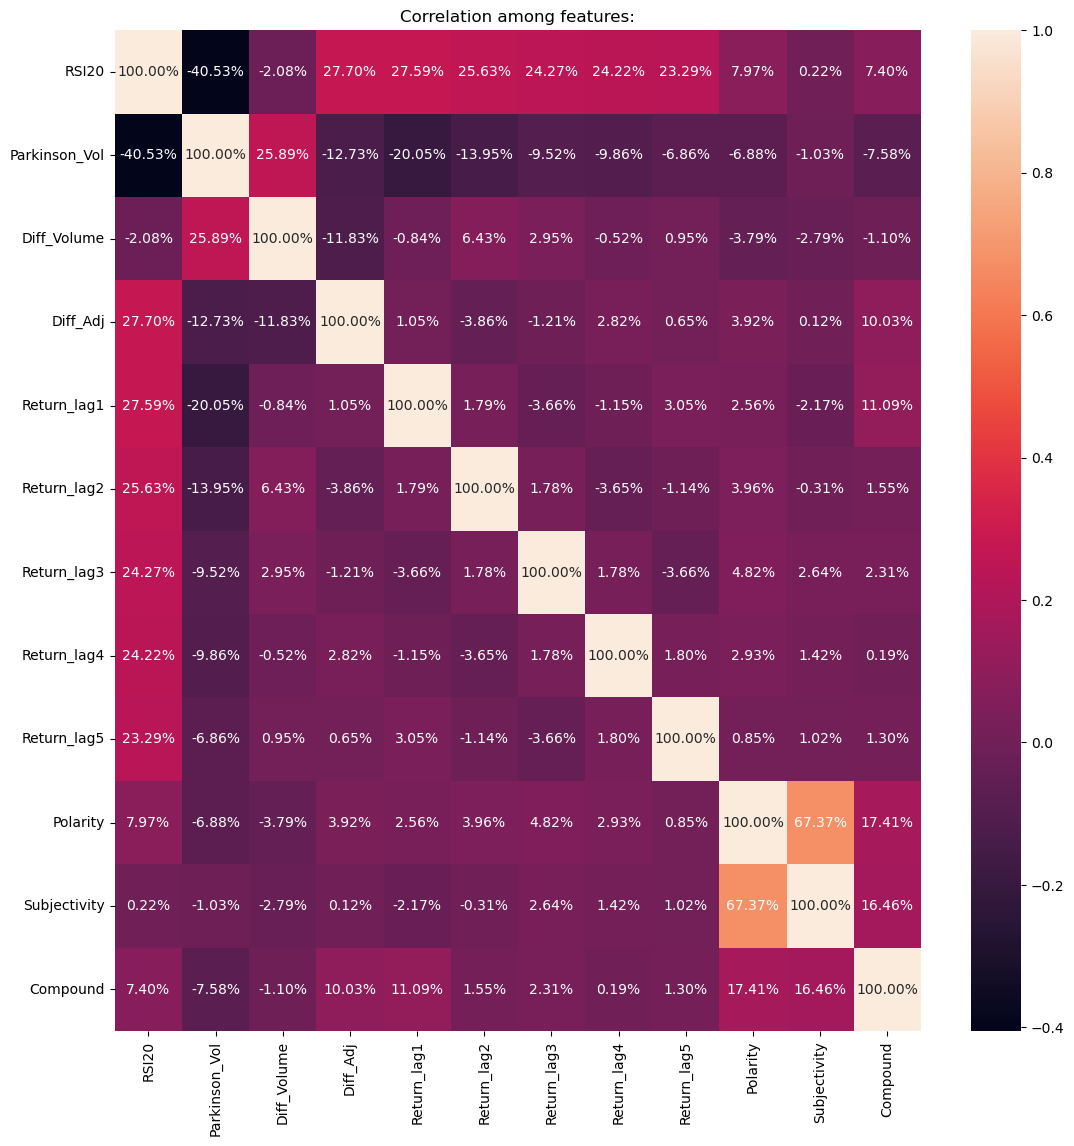

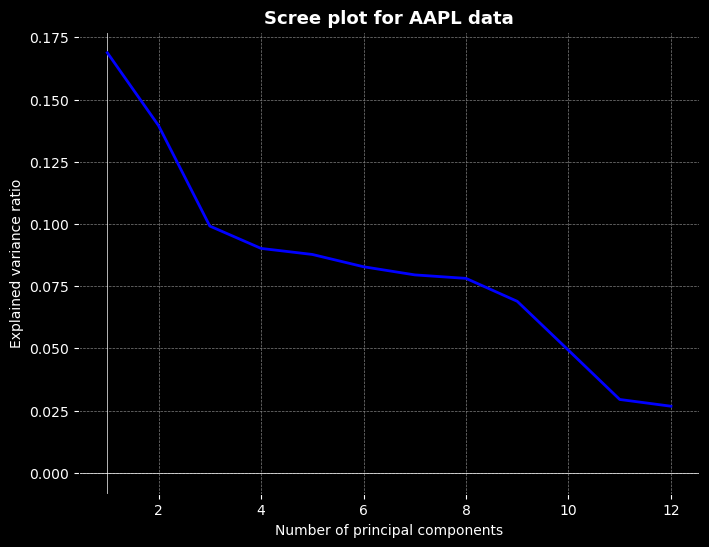

Number of features: 12
Number of principal components to keep: 9
Explained variance ratio for the selected principal components: 89.4615 %.


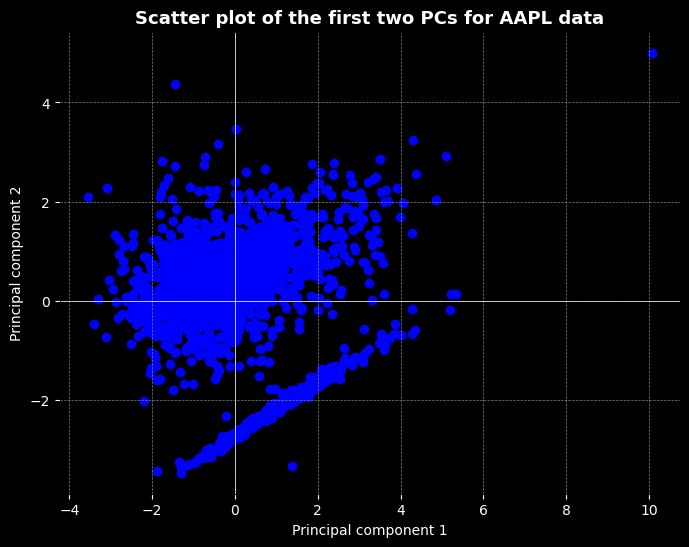

In [21]:
#Visualize the correlation
fig = plt.subplots(figsize= (13,13))
plt.title(f"Correlation among features:")
sns.heatmap(asset_features.corr(), annot= True, fmt= '.2%')
plt.savefig('Correlation.png')

scaler = StandardScaler()
features_scaled = scaler.fit_transform(asset_features)

# Perform PCA
pca = PCA() 
pca.fit(features_scaled)

# Explained variance ratio
fig, ax = plt.subplots(figsize=(8, 6), facecolor='black')
ax.set_facecolor('black')
ax.axhline(0, color='white', linewidth=0.5)
ax.axvline(1, color='white', linewidth=0.5)
ax.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='blue', linewidth=2)
ax.set_xlabel('Number of principal components',color='white')
ax.set_ylabel('Explained variance ratio', color='white')
ax.set_title(f'Scree plot for {ticker} data', fontsize=13, color='white', fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.savefig('ScreePlot.png')
plt.show()

print(f"Number of features: {len(asset_features.columns)}")
# Determine the number of principal components to keep
num_components = next(i for i, v in enumerate(pca.explained_variance_ratio_.cumsum()) if v >= 0.90)
print(f"Number of principal components to keep: {num_components}")

# Transform the data using the selected number of principal components
X_pca = pca.transform(features_scaled)[:, :num_components]

features_pca = pd.DataFrame(X_pca, index=asset_features.index)
features_pca.columns = [f'PC{i+1}' for i in range(num_components)]

# Display the explained variance ratio for the selected principal components
print("Explained variance ratio for the selected principal components:", \
      round(sum(pca.explained_variance_ratio_[:num_components])*100,4),'%.')

# Visualize the first two principal components
fig, ax = plt.subplots(figsize=(8, 6), facecolor='black')
ax.set_facecolor('black')
ax.axhline(0, color='white', linewidth=0.5)
ax.axvline(0, color='white', linewidth=0.5)
ax.scatter(features_pca['PC1'], features_pca['PC2'], color= 'blue')
ax.set_xlabel('Principal component 1', color='white')
ax.set_ylabel('Principal component 2', color='white')
ax.set_title(f'Scatter plot of the first two PCs for {ticker} data',fontsize=13, color='white', fontweight='bold')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.savefig('First-two-PC.png')
plt.show()

# Ensemble Methods 

In [22]:
# Reorder the columns
gb_cols = ['RSI20', "Parkinson_Vol", "Diff_Volume", "Diff_Adj", "Return_lag1", "Return_lag2", "Return_lag3", "Return_lag4",\
           "Return_lag5", 'Polarity', 'Subjectivity',  'Compound',  'Next_Day_Return']
asset_features = asset_data[gb_cols]
asset_features.head()

,RSI20,Parkinson_Vol,Diff_Volume,Diff_Adj,Return_lag1,Return_lag2,Return_lag3,Return_lag4,Return_lag5,Polarity,Subjectivity,Compound,Next_Day_Return
Date,,,,,,,,,,,,,
2012-08-20,81.504767,0.013929,170623600.0,0.516731,0.018327,0.008697,-0.001362,0.002679,0.013262,0.000000,0.000000,0.0000,-0.013760
2012-08-21,73.329482,0.022254,199334800.0,-0.275650,0.025952,0.018327,0.008697,-0.001362,0.002679,0.060724,0.406804,0.3400,0.019337
2012-08-22,76.783835,0.019052,-247396800.0,0.388453,-0.013760,0.025952,0.018327,0.008697,-0.001362,0.057615,0.434729,-0.0772,-0.009373
2012-08-23,72.001905,0.007896,-145194000.0,-0.189228,0.019337,-0.013760,0.025952,0.018327,0.008697,0.063988,0.452877,0.2023,0.000890
2012-08-24,72.174370,0.012628,17211600.0,0.017891,-0.009373,0.019337,-0.013760,0.025952,0.018327,0.000000,0.000000,0.0000,0.018613


In [23]:
def mean_absolute_scaled_error(y_true, y_pred):
    n = len(y_true)
    # naive_error = np.abs(np.diff(y_true)).sum() / (n - 1) # when price is invovled 
    naive_error = np.mean(np.abs(y_true)) # the returns of the naive forecast are zero
    errors = np.abs(y_true - y_pred)
    return errors.mean() / naive_error

GBR Mean Absolute Scaled Error: 1.2187887089745435
GBR Percentage improvement over naive forecast: -21.88%
RW Mean Absolute Scaled Error: 1.0
RW Percentage improvement over naive forecast: 0.00%


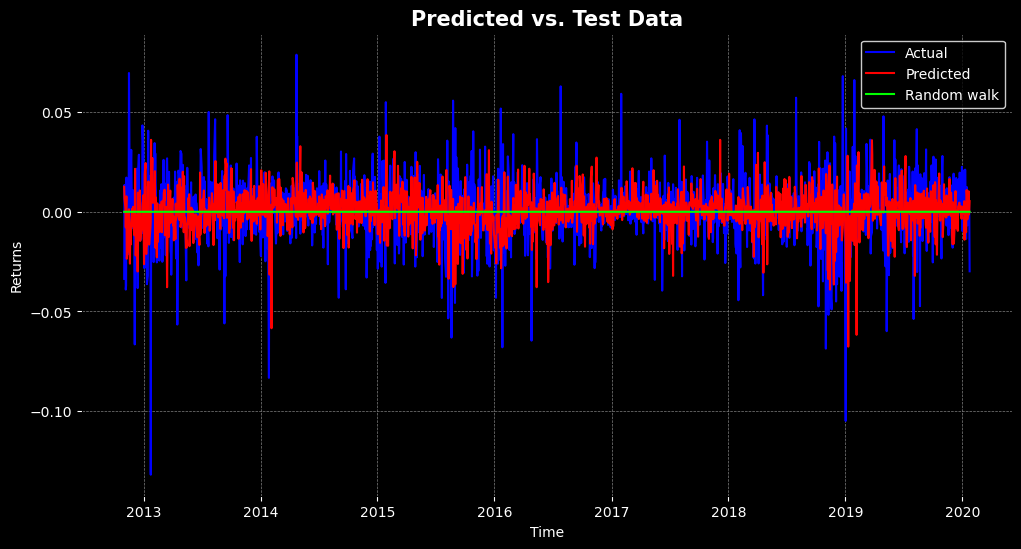

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Separate the features and the target variable
train = asset_features.iloc[:,:-1] # remove news .iloc[:,4:7]
test = asset_features.iloc[:,-1]

n_samples = len(asset_features)
window_size = 50 # Set the window size for the walk-forward validation
test_size = 1  # Set the test set size

# Initialize lists to store the results
x_pred = []
actual_y_train = []
y_pred = []
actual_y_test = []

# Walk forward Testing
for i in range(window_size, n_samples, test_size):
    # Split the data into train and test sets
    X_train = train[i-window_size:i]
    y_train = test[i-window_size:i]
    X_test = train[i:i+test_size]
    y_test = test[i:i+test_size]

    actual_y_train.append(y_train)
    actual_y_test.append(y_test)
    
    # Without PCA
    scaler = StandardScaler()
    X_train_Scaled = scaler.fit_transform(X_train)
    X_test_Scaled = scaler.transform(X_test)
    # Create the Gradient Boosting Regressor
    gbr = GradientBoostingRegressor(n_estimators=35, learning_rate=0.3, max_features=2, max_depth=2,\
                                     validation_fraction=0.1)
    # Fit the Gradient Boosting Regressor
    gbr.fit(X_train_Scaled, y_train)

    X_Pred = gbr.predict(X_train_Scaled)
    Y_Pred = gbr.predict(X_test_Scaled)
    x_pred.append(X_Pred)
    y_pred.append(Y_Pred)

# Evaluate the model on the train and test sets
mase = mean_absolute_scaled_error(np.array(actual_y_test).reshape(-1), np.array(y_pred).reshape(-1))
print(f"GBR Mean Absolute Scaled Error: {mase}")

improvement = (1 - mase) * 100
print(f"GBR Percentage improvement over naive forecast: {improvement:.2f}%")

random_walk = np.zeros_like(actual_y_test).reshape(-1)
rw_mase = mean_absolute_scaled_error(np.array(actual_y_test).reshape(-1), random_walk)
print(f"RW Mean Absolute Scaled Error: {rw_mase}")

rw_improvement = (1 - rw_mase) * 100
print(f"RW Percentage improvement over naive forecast: {rw_improvement:.2f}%")

dates = pd.DatetimeIndex([series.index[0] for series in actual_y_test])
# Plot the predicted vs. actual values
fig, ax = plt.subplots(figsize=(12, 6),facecolor='black')
ax.set_facecolor('black')
ax.plot(dates, actual_y_test, label='Actual', color='blue')
ax.plot(dates, y_pred, label='Predicted', color='red')
ax.plot(dates, random_walk, label='Random walk', color = 'lime')
ax.set_xlabel('Time', color='white')
ax.set_ylabel('Returns', color='white')
ax.set_title('Predicted vs. Test Data', color='white', fontsize=15, fontweight='bold')
ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()
fig.savefig('GBR-Results.png')

# Ensemble Methods with Principal Component Analysis (PCA) 

PCA & GBR Mean Absolute Scaled Error: 1.2231398810740326
PCA & GBR Percentage improvement over naive forecast: -22.31%
RW Mean Absolute Scaled Error: 1.0
RW Percentage improvement over naive forecast: 0.00%


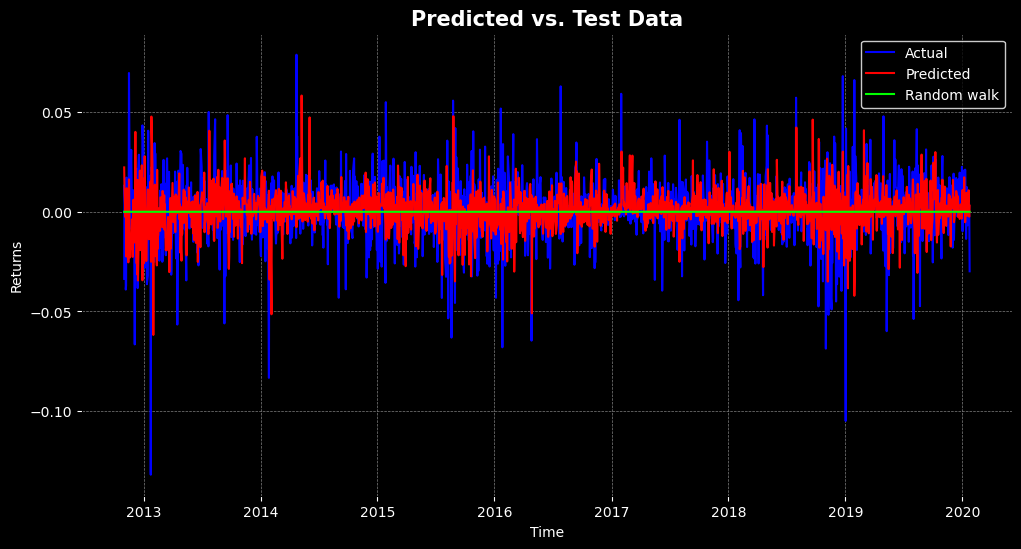

In [25]:
# Separate the features and the target variable
train = asset_features.iloc[:,:-1] # remove news .iloc[:,4:7]
test = asset_features.iloc[:,-1]

n_samples = len(asset_features)
window_size = 50  # Set the window size for the walk-forward validation
test_size = 1  # Set the test set size

# Initialize lists to store the results
x_pred = []
actual_y_train = []
y_pred = []
actual_y_test = []

# Walk forward Testing
for i in range(window_size, n_samples, test_size):
    # Split the data into train and test sets
    X_train = train[i-window_size:i]
    y_train = test[i-window_size:i]
    X_test = train[i:i+test_size]
    y_test = test[i:i+test_size]

    actual_y_train.append(y_train)
    actual_y_test.append(y_test)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=0.90)  # n_components=0.90 Keep components that explain 90% of variance
    
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Create the Gradient Boosting Regressor
    gbr = GradientBoostingRegressor(n_estimators=35, learning_rate=0.3, max_features=2, max_depth=2,\
                                     validation_fraction=0.1)
    # Fit the Gradient Boosting Regressor
    gbr.fit(X_train_pca, y_train)

    X_Pred = gbr.predict(X_train_pca)
    Y_Pred = gbr.predict(X_test_pca)
    x_pred.append(X_Pred)
    y_pred.append(Y_Pred)

# Evaluate the model on the train and test sets
mase = mean_absolute_scaled_error(np.array(actual_y_test).reshape(-1), np.array(y_pred).reshape(-1))
print(f"PCA & GBR Mean Absolute Scaled Error: {mase}")

improvement = (1 - mase) * 100
print(f"PCA & GBR Percentage improvement over naive forecast: {improvement:.2f}%")

random_walk = np.zeros_like(actual_y_test).reshape(-1)
rw_mase = mean_absolute_scaled_error(np.array(actual_y_test).reshape(-1), random_walk)
print(f"RW Mean Absolute Scaled Error: {rw_mase}")

rw_improvement = (1 - rw_mase) * 100
print(f"RW Percentage improvement over naive forecast: {rw_improvement:.2f}%")

dates = pd.DatetimeIndex([series.index[0] for series in actual_y_test])
# Plot the predicted vs. actual values
fig, ax = plt.subplots(figsize=(12, 6),facecolor='black')
ax.set_facecolor('black')
ax.plot(dates, actual_y_test, label='Actual', color='blue')
ax.plot(dates, y_pred, label='Predicted', color='red')
ax.plot(dates, random_walk, label='Random walk', color = 'lime')
ax.set_xlabel('Time', color='white')
ax.set_ylabel('Returns', color='white')
ax.set_title('Predicted vs. Test Data', color='white', fontsize=15, fontweight='bold')
ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()
fig.savefig('PCA-GBR-Results.png')

# Long Short Term Memory (LSTM)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [27]:
# Reorder the columns
pred_column = 'Log_Return'# 'Log_Return'
lstm_cols = [ 'RSI20', "Parkinson_Vol", "Diff_Volume", "Diff_Adj", "Return_lag1", "Return_lag2", "Return_lag3", "Return_lag4",\
           "Return_lag5", 'Polarity', 'Subjectivity',  'Compound', pred_column]
# Next_Day_Return should become Daily return because the LSTM will take the appropriate sequence of return after each day.
# asset_features['Daily_Return'] = asset_data['Next_Day_Return'].shift()
# asset_data.dropna(inplace=True)
asset_features = asset_data[lstm_cols]
asset_features.head()

,RSI20,Parkinson_Vol,Diff_Volume,Diff_Adj,Return_lag1,Return_lag2,Return_lag3,Return_lag4,Return_lag5,Polarity,Subjectivity,Compound,Log_Return
Date,,,,,,,,,,,,,
2012-08-20,81.504767,0.013929,170623600.0,0.516731,0.018327,0.008697,-0.001362,0.002679,0.013262,0.000000,0.000000,0.0000,0.025952
2012-08-21,73.329482,0.022254,199334800.0,-0.275650,0.025952,0.018327,0.008697,-0.001362,0.002679,0.060724,0.406804,0.3400,-0.013760
2012-08-22,76.783835,0.019052,-247396800.0,0.388453,-0.013760,0.025952,0.018327,0.008697,-0.001362,0.057615,0.434729,-0.0772,0.019337
2012-08-23,72.001905,0.007896,-145194000.0,-0.189228,0.019337,-0.013760,0.025952,0.018327,0.008697,0.063988,0.452877,0.2023,-0.009373
2012-08-24,72.174370,0.012628,17211600.0,0.017891,-0.009373,0.019337,-0.013760,0.025952,0.018327,0.000000,0.000000,0.0000,0.000890


## Prepare the time series data

#### Split the data

In [28]:
train_size = 0.7
validation_size = 0.1
test_size = 0.2

# Determine the split indices
split_index_1 = int(train_size * len(asset_features))
split_index_2 = int((train_size + validation_size) * len(asset_features))

# Split the data
train_features = asset_features.iloc[:split_index_1]
validation_features = asset_features.iloc[split_index_1:split_index_2]
test_features = asset_features.iloc[split_index_2:]

X_test_date = test_features.index

#### Transform the data to sequences as input for the LSTM then Feature Scaling

In [29]:
input_time_steps = 25 # Number of past time steps (# days)
output_time_steps = 1  # Number of steps we want to look into the future (prediction of next day return).
number_of_features = train_features.shape[1] - 1  # Excluding the target column

def return_Seq(data, input_time_steps, output_time_steps):
    X, y = [], []
    for i in range(len(data) - input_time_steps - output_time_steps + 1):
        scaler = StandardScaler()
        X.append(scaler.fit_transform(data.iloc[i:(i + input_time_steps), :number_of_features]))
        y.append(data.iloc[(i + input_time_steps):(i + input_time_steps + output_time_steps), -1])
    return np.array(X), np.array(y)

X_train, y_train = return_Seq(train_features, input_time_steps, output_time_steps) 
X_val, y_val = return_Seq(validation_features, input_time_steps, output_time_steps) 
X_test, y_test = return_Seq(test_features, input_time_steps, output_time_steps) 

print('X_train shape:', X_train.shape) # Should be (samples, input_time_steps, num_input_features)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape) 
print('X_test shape:', X_test.shape) 

X_train shape: (1283, 25, 12)
y_train shape: (1283, 1)
X_val shape: (162, 25, 12)
X_test shape: (349, 25, 12)


## Build the LSTM Model

In [30]:
# LSTM Model Creation
lstm_model = Sequential([
    LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])), #input = time steps, features
    Dropout(0.2),
    # LSTM(units = 100, return_sequences=True),
    # Dropout(0.2),
    LSTM(units = 30),
    Dropout(0.2),
    Dense(units = output_time_steps)
])

lstm_model.compile(optimizer = 'adam', loss = 'mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 50)            12600     
                                                                 
 dropout (Dropout)           (None, 25, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30)                9720      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 22,351
Trainable params: 22,351
Non-trainable params: 0
_________________________________________________________________


## Train the model

Epoch 1/20
21/21 [==============================] - 6s 82ms/step - loss: 0.0031 - val_loss: 7.4355e-04 - lr: 0.0010
Epoch 2/20
21/21 [==============================] - 1s 28ms/step - loss: 0.0013 - val_loss: 5.1184e-04 - lr: 0.0010
Epoch 3/20
21/21 [==============================] - 1s 28ms/step - loss: 9.2316e-04 - val_loss: 2.6244e-04 - lr: 0.0010
Epoch 4/20
21/21 [==============================] - 1s 27ms/step - loss: 7.7746e-04 - val_loss: 3.1277e-04 - lr: 0.0010
Epoch 5/20
21/21 [==============================] - 1s 29ms/step - loss: 6.7053e-04 - val_loss: 3.2394e-04 - lr: 0.0010
Epoch 6/20
19/21 [==========================>...] - ETA: 0s - loss: 6.0503e-04
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
21/21 [==============================] - 1s 28ms/step - loss: 5.9726e-04 - val_loss: 2.7792e-04 - lr: 0.0010
Epoch 7/20
21/21 [==============================] - 1s 27ms/step - loss: 5.0294e-04 - val_loss: 2.7226e-04 - lr: 1.0000e-05
Epoch 8/20
21/21 [=

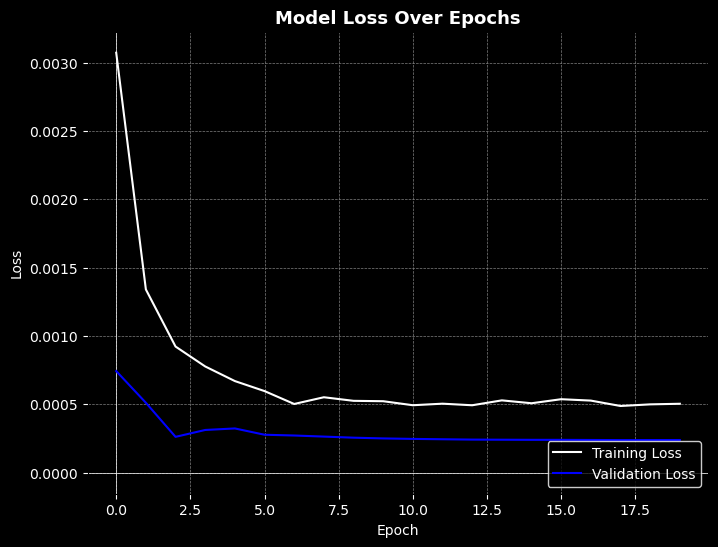

In [31]:
# Monitor validation loss
monitor = 'val_loss'

callbacks = [

# Reduce learning rate when a metric has stopped improving
ReduceLROnPlateau(monitor=monitor,
                  factor=0.01, # factor by which the learning rate will be reduced
                  patience=3,
                  verbose=1, 
                  min_lr=1e-5), # lower bound on the learning rate

        # Define early stopping callback
EarlyStopping(
    monitor=monitor,  
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    mode='min',          # The direction is automatically inferred if not set, but we can set it to 'min' for loss
    verbose=1,           # Print a message when early stopping is triggered
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
    )

]

history = lstm_model.fit(X_train, y_train, epochs = 20, batch_size = 64, validation_data=(X_val, y_val),\
                         verbose = 1, shuffle = False, callbacks=callbacks, workers = 5)

fig, ax = plt.subplots(figsize=(8, 6), facecolor='black')
ax.set_facecolor('black')
ax.axhline(0, color='white', linewidth=0.5)
ax.axvline(0, color='white', linewidth=0.5)
ax.plot(history.history['loss'], label='Training Loss', color='white')
ax.plot(history.history['val_loss'], label='Validation Loss', color='blue')
ax.set_title('Model Loss Over Epochs', color='white', fontsize=13, fontweight='bold')
ax.set_xlabel('Epoch', color='white')
ax.set_ylabel('Loss', color='white')
ax.legend(loc='lower right', facecolor='black', edgecolor='white', labelcolor='white')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
plt.show()
fig.savefig('Loss.png')

### Prediction and Results without output scaling

11/11 [==============================] - 0s 17ms/step
LSTM Mean Absolute Scaled Error: 1.039313527919015
LSTM Percentage improvement over naive forecast: -3.93%
LSTM Error Squared: 0.12675784688832087
RW Mean Absolute Scaled Error: 1.0
RW Percentage improvement over naive forecast: 0.00%
RW Error Squared: 0.11877705091275573


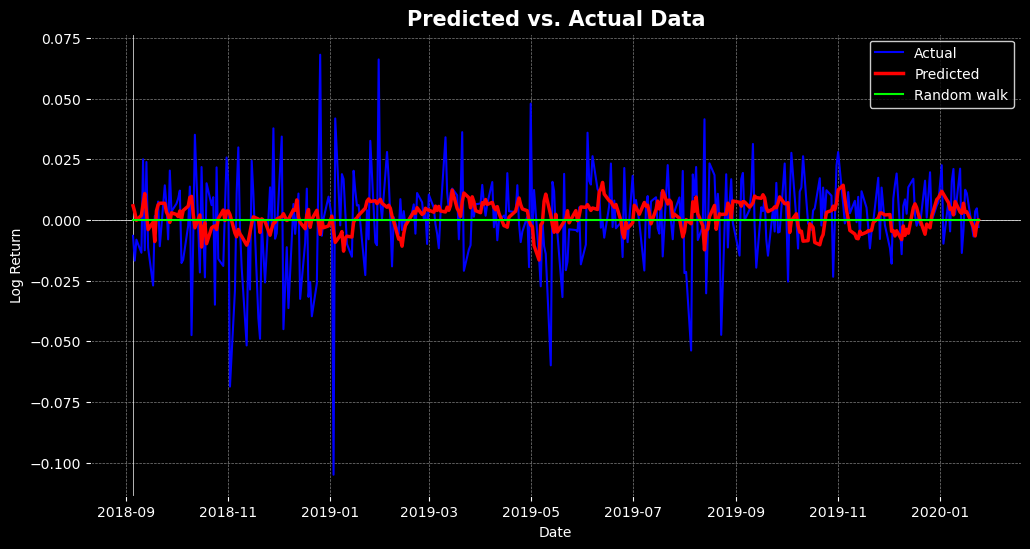

In [40]:
# Make predictions
y_test_pred = lstm_model.predict(X_test)

# Calculate train performance metrics
mase = mean_absolute_scaled_error(np.array(y_test).reshape(-1), np.array(y_test_pred).reshape(-1))
print(f"LSTM Mean Absolute Scaled Error: {mase}")

improvement = (1 - mase) * 100
print(f"LSTM Percentage improvement over naive forecast: {improvement:.2f}%")

# Prediction Error
error = y_test - y_test_pred 
print('LSTM Error Squared:',sum(error**2)[0])

# # Random Walk for price
# random_walk = np.roll(y_test, shift=1, axis=0)
# random_walk[0] = y_test[0]
# Random Walk for return
random_walk = np.zeros_like(y_test_pred).reshape(-1)

rw_mase = mean_absolute_scaled_error(np.array(y_test).reshape(-1), random_walk)
print(f"RW Mean Absolute Scaled Error: {rw_mase}")

rw_improvement = (1 - rw_mase) * 100
print(f"RW Percentage improvement over naive forecast: {rw_improvement:.2f}%")

rw_error = y_test - random_walk 
print('RW Error Squared:',sum(rw_error**2)[0])


# Plot the predicted vs. actual values
fig, ax = plt.subplots(figsize=(12, 6),facecolor='black')
ax.set_facecolor('black')
ax.axhline(0, color='white', linewidth=0.5)
ax.axvline(pd.to_datetime(X_test_date[input_time_steps]), color='white', linewidth=0.5)
ax.plot(pd.to_datetime(X_test_date[input_time_steps:]), y_test, label='Actual', color = 'blue') # pd.to_datetime(X_test_date[input_time_steps:]),
ax.plot(pd.to_datetime(X_test_date[input_time_steps:]), y_test_pred, label='Predicted',color = 'red',linewidth=2.5)
ax.plot(pd.to_datetime(X_test_date[input_time_steps:]), random_walk, label='Random walk', color = 'lime')
ax.set_xlabel('Date', color='white')
ax.set_ylabel('Log Return', color='white')
ax.set_title('Predicted vs. Actual Data', color='white', fontsize=15, fontweight='bold')
ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
fig.savefig('LSTM-Results.png')
plt.show()

**GridSearchCV**

In [42]:
def create_lstm_model(units1=100, units2=80, dropout1=0.2, dropout2=0.2, learning_rate=0.001):
    model = Sequential([
        LSTM(units=units1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(dropout1),
        LSTM(units=units2),
        Dropout(dropout2),
        Dense(units=output_time_steps)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Wrap the model
model = KerasRegressor(build_fn=create_lstm_model, verbose=1)

# Define the grid search parameters
param_grid = {
    'units1': [50, 100],
    'units2': [50, 80],
    'dropout1': [0.1, 0.2],
    'dropout2': [0.1, 0.2],
    'batch_size': [16, 32],
    'epochs': [15, 30]
}

# # Time Series Split
# tscv = TimeSeriesSplit(n_splits=5)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Grid Search
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           # cv=tscv,
                           n_jobs=6,
                           verbose=2)

# Fit the grid search to the data
grid_result = grid_search.fit(X_train, y_train, 
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping])

C:\Users\User\AppData\Local\Temp\ipykernel_12144\1494988004.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, verbose=1)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Epoch 1/15
81/81 [==============================] - 11s 40ms/step - loss: 0.0016 - val_loss: 3.6619e-04
Epoch 2/15
81/81 [==============================] - 2s 27ms/step - loss: 6.5332e-04 - val_loss: 2.4885e-04
Epoch 3/15
81/81 [==============================] - 3s 34ms/step - loss: 5.1968e-04 - val_loss: 2.3439e-04
Epoch 4/15
81/81 [==============================] - 3s 32ms/step - loss: 4.1568e-04 - val_loss: 2.4744e-04
Epoch 5/15
81/81 [==============================] - 2s 31ms/step - loss: 3.8951e-04 - val_loss: 2.7801e-04
Epoch 6/15
81/81 [==============================] - 2s 31ms/step - loss: 3.6118e-04 - val_loss: 2.0472e-04
Epoch 7/15
81/81 [==============================] - 2s 30ms/step - loss: 3.5060e-04 - val_loss: 2.1835e-04
Epoch 8/15
81/81 [==============================] - 2s 30ms/step - loss: 3.3528e-04 - val_loss: 2.6403e-04
Epoch 9/15
81/81 [==============================] - 2s 30ms/step - loss: 3.1669e-04 -

Best: -0.000259 using {'batch_size': 16, 'dropout1': 0.2, 'dropout2': 0.2, 'epochs': 15, 'units1': 100, 'units2': 50}
11/11 [==============================] - 0s 10ms/step - loss: 3.5449e-04
Test Loss: 0.0003544901846908033
11/11 [==============================] - 0s 10ms/step
LSTM Mean Absolute Scaled Error: 1.0268263449633581
LSTM Percentage improvement over naive forecast: -2.68%
LSTM Error Squared: 0.12371706526115564
RW Mean Absolute Scaled Error: 1.0
RW Percentage improvement over naive forecast: 0.00%
RW Error Squared: 0.11877705091275573


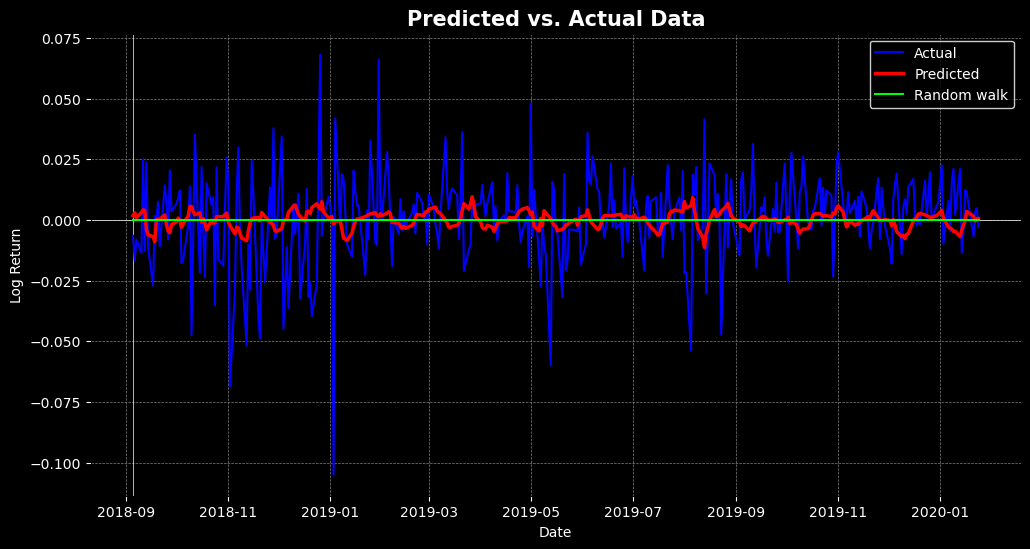

In [44]:
# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best model
best_model = grid_result.best_estimator_.model

# Evaluate on test set
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
y_test_pred = best_model.predict(X_test)

# Calculate train performance metrics
mase = mean_absolute_scaled_error(np.array(y_test).reshape(-1), np.array(y_test_pred).reshape(-1))
print(f"LSTM Mean Absolute Scaled Error: {mase}")

improvement = (1 - mase) * 100
print(f"LSTM Percentage improvement over naive forecast: {improvement:.2f}%")

# Prediction Error
error = y_test - y_test_pred 
print('LSTM Error Squared:',sum(error**2)[0])

# # Random Walk for price
# random_walk = np.roll(y_test, shift=1, axis=0)
# random_walk[0] = y_test[0]
# Random Walk for return
random_walk = np.zeros_like(y_test_pred).reshape(-1)

rw_mase = mean_absolute_scaled_error(np.array(y_test).reshape(-1), random_walk)
print(f"RW Mean Absolute Scaled Error: {rw_mase}")

rw_improvement = (1 - rw_mase) * 100
print(f"RW Percentage improvement over naive forecast: {rw_improvement:.2f}%")

rw_error = y_test - random_walk 
print('RW Error Squared:',sum(rw_error**2)[0])


# Plot the predicted vs. actual values
fig, ax = plt.subplots(figsize=(12, 6),facecolor='black')
ax.set_facecolor('black')
ax.axhline(0, color='white', linewidth=0.5)
ax.axvline(pd.to_datetime(X_test_date[input_time_steps]), color='white', linewidth=0.5)
ax.plot(pd.to_datetime(X_test_date[input_time_steps:]), y_test, label='Actual', color = 'blue') # pd.to_datetime(X_test_date[input_time_steps:]),
ax.plot(pd.to_datetime(X_test_date[input_time_steps:]), y_test_pred, label='Predicted',color = 'red',linewidth=2.5)
ax.plot(pd.to_datetime(X_test_date[input_time_steps:]), random_walk, label='Random walk', color = 'lime')
ax.set_xlabel('Date', color='white')
ax.set_ylabel('Log Return', color='white')
ax.set_title('Predicted vs. Actual Data', color='white', fontsize=15, fontweight='bold')
ax.legend(loc='upper right', facecolor='black', edgecolor='white', labelcolor='white')
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', colors='white')
fig.savefig('LSTM-Grid-Results.png')
plt.show()